# Texas Salary Predicton

## Business Case: Predicting the salary of Texas' employees with given features

In [1]:
## importing the libraries
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## importing the data
data=pd.read_csv("salary.csv")

In [3]:
data

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93000,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN


## Domain Analysis

### Basic understanding of features

## Basic Checks

In [4]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [5]:
data.tail()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
149476,809,STATE PRESERVATION BOARD ...,WESSELS,JOHN,P,6232,SECURITY OFFICER III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,2899.00,34788.00,770781,NaN,NaN,NaN,NaN,NaN
149477,809,STATE PRESERVATION BOARD ...,WINDHAM,EVAN,A,0302,WEB ADMINISTRATOR III ...,WHITE,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5500.00,66000.00,847431,NaN,NaN,NaN,NaN,NaN
149478,809,STATE PRESERVATION BOARD ...,WRIGHT,DERRICK,C,0130,CUSTOMER SERVICE REP I ...,WHITE,MALE,CRP - CLASSIFIED REGULAR PART-TIME,...,12.93,20.0,1120.60,13447.20,34266,NaN,NaN,NaN,NaN,NaN
149479,809,STATE PRESERVATION BOARD ...,YOUNG,DOUGLAS,R,1572,PROGRAM SPECIALIST III ...,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00,40.0,5744.16,68929.92,123490,NaN,NaN,NaN,NaN,NaN
149480,809,STATE PRESERVATION BOARD ...,ZUNKER,GEORGIA,P,0130,CUSTOMER SERVICE REP I ...,WHITE,FEMALE,CRP - CLASSIFIED REGULAR PART-TIME,...,11.74,20.0,1017.46,12209.52,103583,NaN,NaN,NaN,NaN,NaN


In [6]:
data.shape

(149481, 21)

In [7]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

## Exploratory Data Analysis

### Univariate Analysis

In [9]:
data.rename(columns={'AGENCY NAME':'Agency_name',
                     'LAST NAME':'Last_name',
                     'FIRST NAME':'First_name',
                     'CLASS CODE':'Class_code',
                     'CLASS TITLE':'Class_title',
                     'EMPLOY DATE':'Employ_date',
                     'HRLY RATE':'Hrly_rate',
                     'HRS PER WK':'Hrs_per_wk',
                     'STATE NUMBER':'State_number'},inplace=True)

In [10]:
data.columns

Index(['AGENCY', 'Agency_name', 'Last_name', 'First_name', 'MI', 'Class_code',
       'Class_title', 'ETHNICITY', 'GENDER', 'STATUS', 'Employ_date',
       'Hrly_rate', 'Hrs_per_wk', 'MONTHLY', 'ANNUAL', 'State_number',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

In [11]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<AxesSubplot:xlabel='AGENCY', ylabel='Density'>

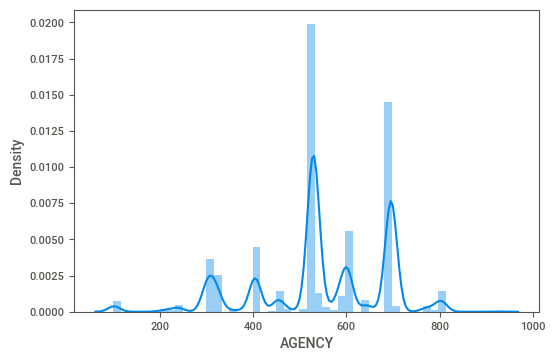

In [12]:
sns.distplot(data.AGENCY)

<AxesSubplot:xlabel='MI', ylabel='count'>

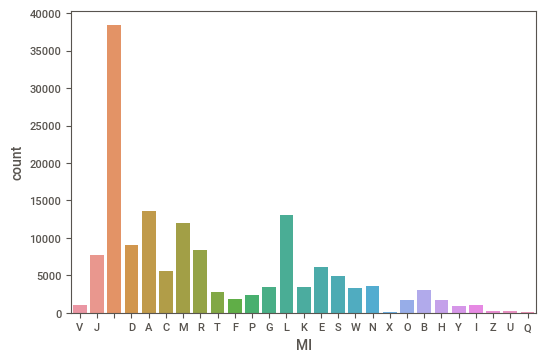

In [13]:
sns.countplot(data.MI)

<AxesSubplot:xlabel='ETHNICITY', ylabel='count'>

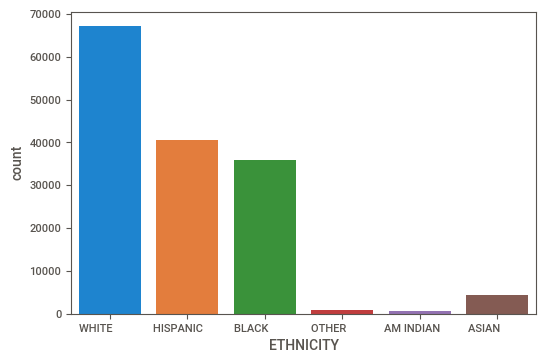

In [14]:
sns.countplot(data.ETHNICITY)

In [15]:
data.Class_code.value_counts()

4504        9267
4505        7895
4503        4718
5622        3646
5121        3307
            ... 
U101           1
U104           1
E176           1
U103           1
E096           1
Name: Class_code, Length: 1481, dtype: int64

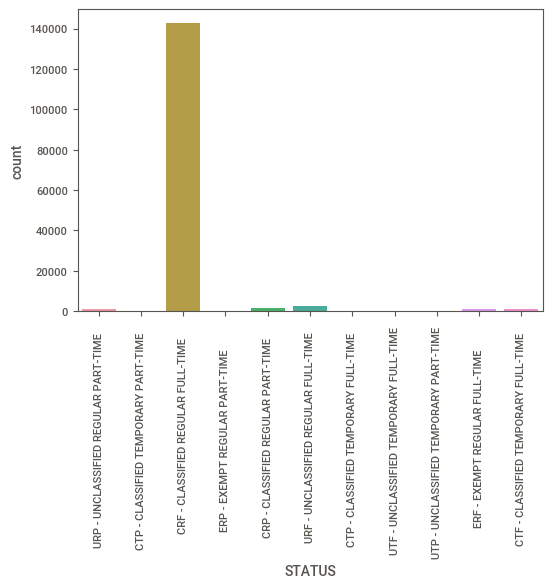

In [16]:
sns.countplot(x=data.STATUS)
plt.xticks(rotation=90)
plt.show()

In [17]:
data.STATUS.value_counts()

CRF - CLASSIFIED REGULAR FULL-TIME          142502
URF - UNCLASSIFIED REGULAR FULL-TIME          2363
CRP - CLASSIFIED REGULAR PART-TIME            1531
CTF - CLASSIFIED TEMPORARY FULL-TIME          1096
URP - UNCLASSIFIED REGULAR PART-TIME           950
ERF - EXEMPT REGULAR FULL-TIME                 923
CTP - CLASSIFIED TEMPORARY PART-TIME            81
UTP - UNCLASSIFIED TEMPORARY PART-TIME          21
UTF - UNCLASSIFIED TEMPORARY FULL-TIME          12
ERP - EXEMPT REGULAR PART-TIME                   1
CTP - CLASSIFIED TEMPORARY FULL-TIME             1
Name: STATUS, dtype: int64

In [18]:
data.Hrly_rate.value_counts()

0.00000     147733
75.96150       323
18.00000       104
19.00000        95
67.30765        74
             ...  
13.34336         1
12.55817         1
31.06644         1
21.52511         1
11.74000         1
Name: Hrly_rate, Length: 206, dtype: int64

<AxesSubplot:xlabel='Hrs_per_wk', ylabel='Count'>

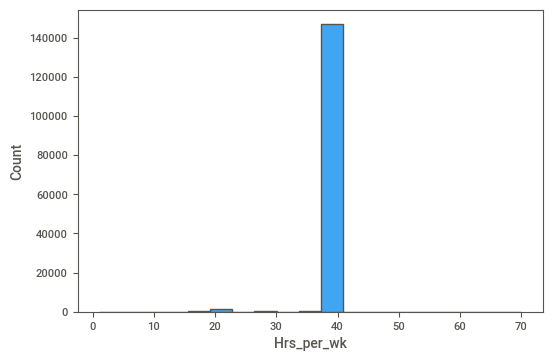

In [19]:
sns.histplot(x=data.Hrs_per_wk)

<AxesSubplot:xlabel='Hrly_rate', ylabel='Count'>

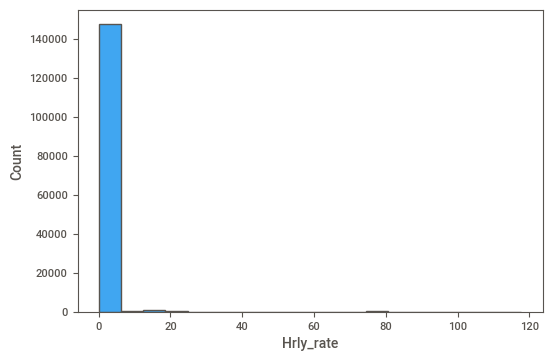

In [20]:
sns.histplot(x=data.Hrly_rate)

In [21]:
data.MONTHLY.value_counts()

3720.17    7391
3284.27    5707
3019.84    4540
3480.77    3318
3906.09    1705
           ... 
5213.39       1
2819.12       1
5290.65       1
5929.30       1
1017.46       1
Name: MONTHLY, Length: 40552, dtype: int64

In [22]:
data.ANNUAL.value_counts()

44642.04    7391
39411.24    5707
36238.08    4540
41769.24    3318
46873.08    1705
            ... 
63487.80       1
71151.60       1
33373.80       1
39657.84       1
12209.52       1
Name: ANNUAL, Length: 40554, dtype: int64

since LAST NAME, FIRST NAME and MI columns are unnecessary features to predict salary, we are not considering those features for exploratory data analysis.

AGENCY : Average number of employees are from agency 500 and 700

AGENCY_NAME : HEALTH AND HUMAN SERVICES COMMISSION and TEXAS DEPARTMENT OF CRIMINAL JUSTICE agencies have most of the employees.

CLASS CODE : 4504, 4504, 4503, 5622, 5121 is the class code that most of the employee have.

ETHNICITY : white, hispanic, black people are more in no.

GENDER : Female employees are more in count.

STATUS : Average employees are belongs to CLASSIFIED REGULAR FULL-TIME status.

HRS PER WEEK : maximum hrs per week is 40

MONTHLY : avrage monthly salary is around 3000

ANNAUL : Average annual income of employees is 35000 to 45000.

Since DUPLICATED, MULTIPLE FULL TIME JOBS, COMBINED MULTIPLE JOBS, SUMMED ANNUAL SALARY, HIDE FROM SEARCH having missing values greater than 99% we are not taking this for EDA.

## Bivariate Analysis

In [27]:
report1=sv.analyze([data,'data'],target_feat='ANNUAL')
report1.show_html()

                                             |                                             | [  0%]   00:00 ->…

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [23]:
data1=data[['AGENCY','Class_code','Hrly_rate','Hrs_per_wk','MONTHLY','State_number','summed_annual_salary','multiple_full_time_jobs']]

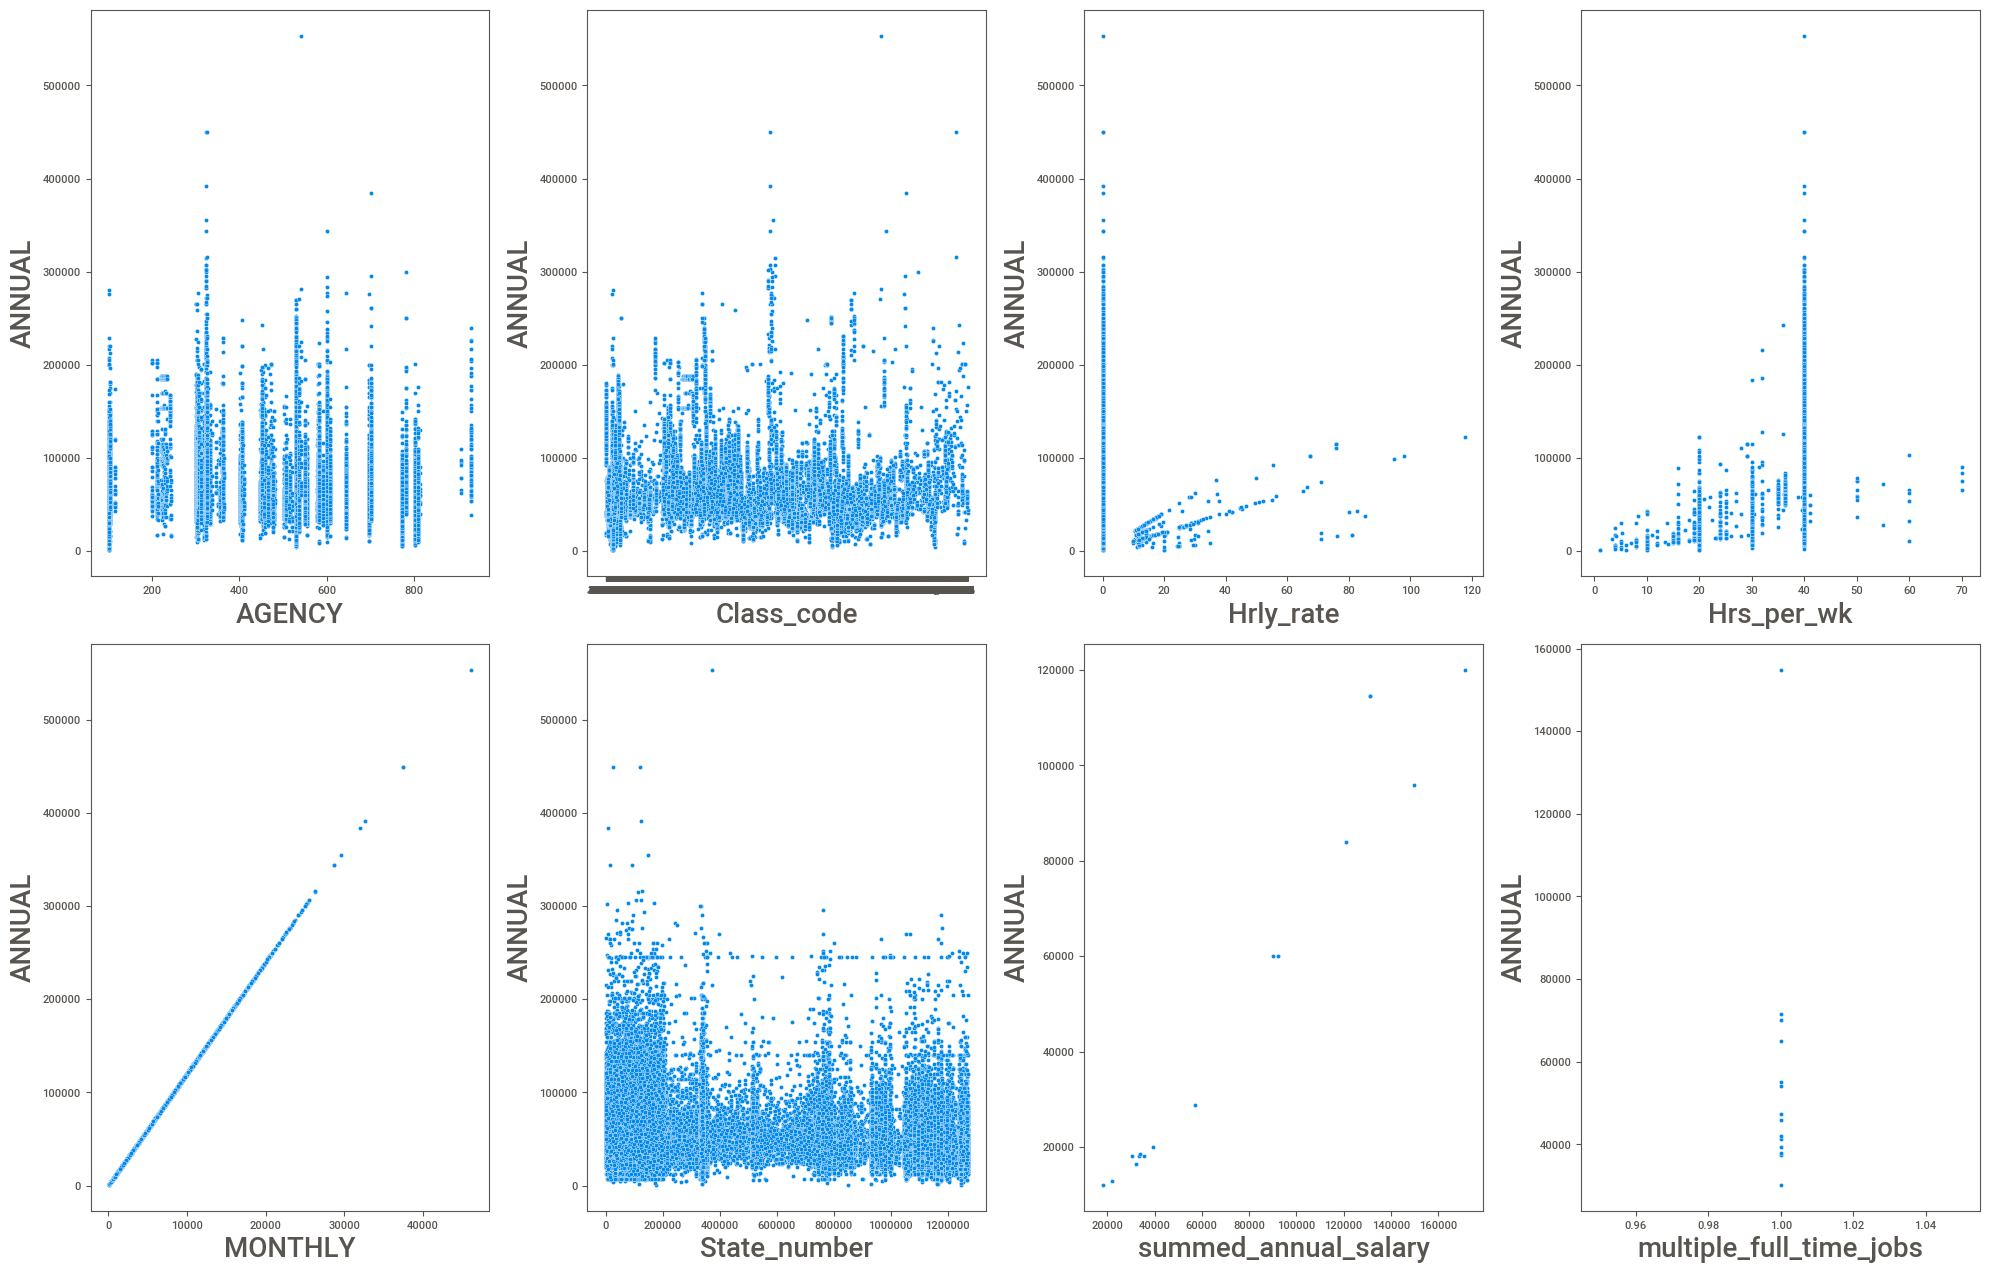

In [24]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data1[column],y=data.ANNUAL)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('ANNUAL',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [25]:
data2=data[['ETHNICITY','GENDER','STATUS']]

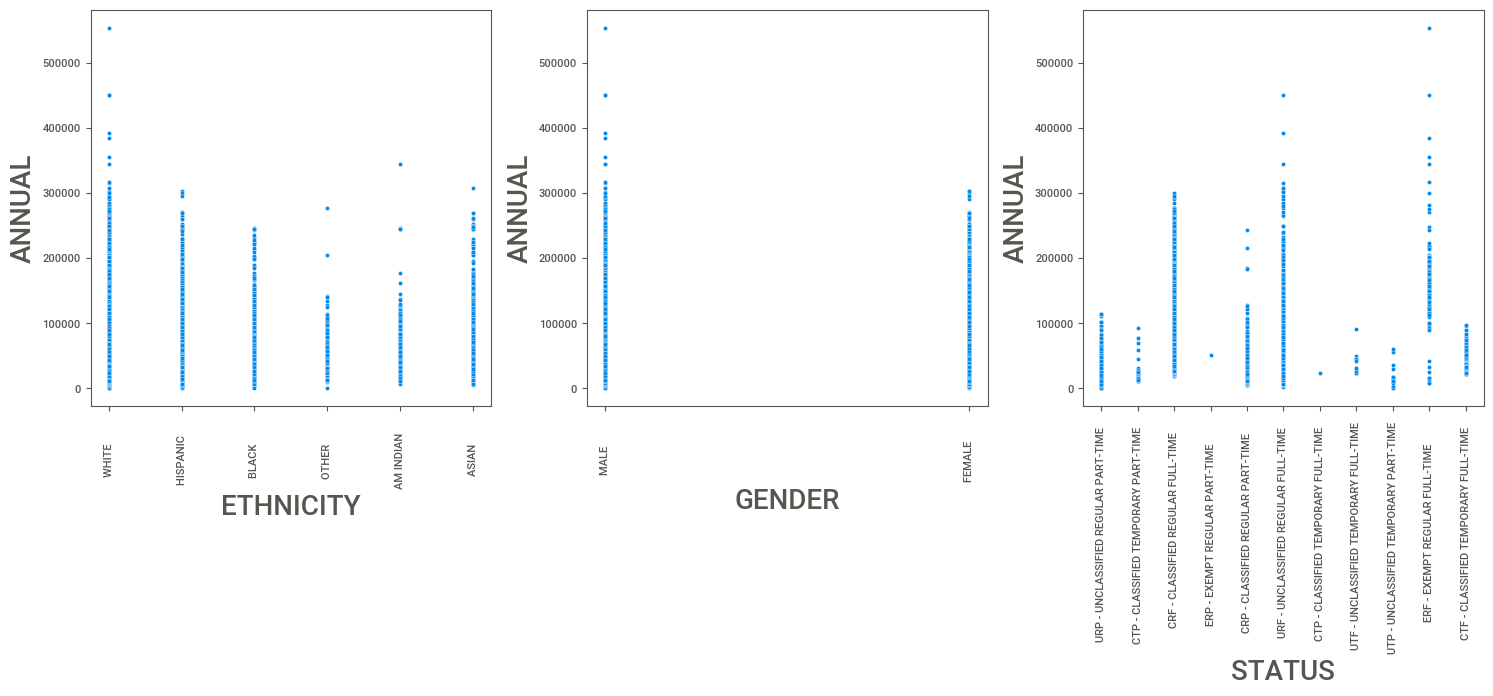

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data2:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=data2[column],y=data.ANNUAL)
        plt.xlabel(column,fontsize=20)
        plt.xticks(rotation=90)
        plt.ylabel('ANNUAL',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [27]:
data.columns

Index(['AGENCY', 'Agency_name', 'Last_name', 'First_name', 'MI', 'Class_code',
       'Class_title', 'ETHNICITY', 'GENDER', 'STATUS', 'Employ_date',
       'Hrly_rate', 'Hrs_per_wk', 'MONTHLY', 'ANNUAL', 'State_number',
       'duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs',
       'summed_annual_salary', 'hide_from_search'],
      dtype='object')

## Data Preprocessing

In [28]:
## Checking missing values
data.isnull().sum()

AGENCY                          0
Agency_name                     0
Last_name                       0
First_name                      0
MI                              0
Class_code                      0
Class_title                     0
ETHNICITY                       0
GENDER                          0
STATUS                          0
Employ_date                     0
Hrly_rate                       0
Hrs_per_wk                      0
MONTHLY                         0
ANNUAL                          0
State_number                    0
duplicated                 149338
multiple_full_time_jobs    149467
combined_multiple_jobs     149384
summed_annual_salary       149465
hide_from_search           149465
dtype: int64

In [29]:
data.drop(columns={'Agency_name','Last_name','First_name','MI','Class_title','Employ_date','duplicated','State_number',
                  'multiple_full_time_jobs','combined_multiple_jobs','summed_annual_salary',
                  'hide_from_search'},inplace=True)

In [30]:
data.columns

Index(['AGENCY', 'Class_code', 'ETHNICITY', 'GENDER', 'STATUS', 'Hrly_rate',
       'Hrs_per_wk', 'MONTHLY', 'ANNUAL'],
      dtype='object')

## Lets check for outliers

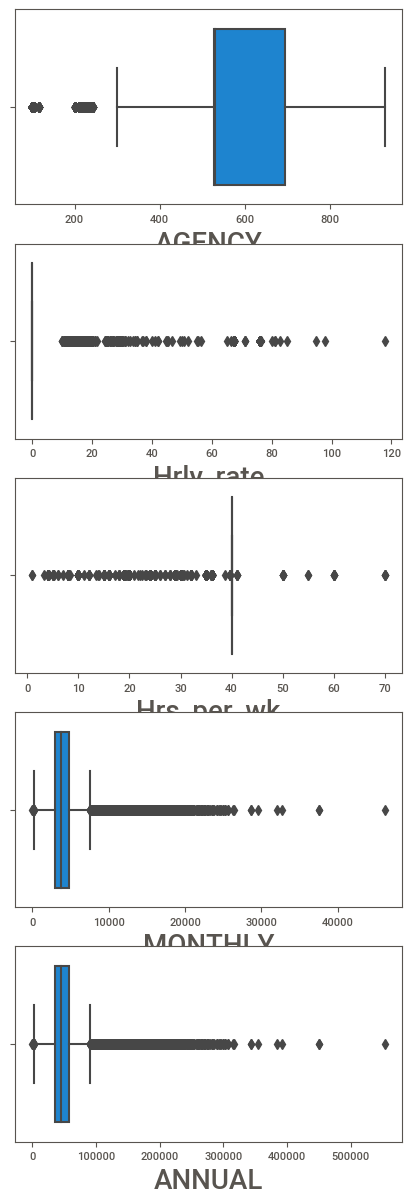

In [31]:
## Let's check for outliers 
box=data[['AGENCY', 'Hrly_rate', 'Hrs_per_wk', 'MONTHLY', 'ANNUAL']]
plt.figure(figsize=(5,15), facecolor='white')
plotnumber = 1

for column in box:
    if plotnumber<=5 :   
        ax = plt.subplot(5,1,plotnumber)
        sns.boxplot(x=box[column])
        plt.xlabel(column,fontsize=20)
      
    plotnumber+=1
plt.show()

Since there are too many outliers we can't impute them so we are taking outliers as our original data

In [32]:
## converting the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data.Class_code=label.fit_transform(data.Class_code)

In [33]:
label = LabelEncoder()
data.ETHNICITY=label.fit_transform(data.ETHNICITY)
data.GENDER=label.fit_transform(data.GENDER)
data.STATUS=label.fit_transform(data.STATUS)

In [34]:
data.head()

,AGENCY,Class_code,ETHNICITY,GENDER,STATUS,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL
0,241,1409,5,1,8,75.96150,29.0,9545.82,114549.84
1,212,616,5,1,4,81.04454,4.0,1404.77,16857.24
2,241,1409,5,1,8,75.96150,29.0,9545.82,114549.84
3,212,616,5,1,4,81.04453,4.0,1404.77,16857.24
4,696,810,3,0,0,0.00000,40.0,3284.27,39411.24


### Skweness and Kurtosis test i.e check for normality

In [35]:

from scipy import stats
for column in box:
    print(stats.skew(box[column]),column)

-0.6048680233999416 AGENCY
15.917938906434207 Hrly_rate
-8.379193623324754 Hrs_per_wk
2.702777438248092 MONTHLY
2.7027774382480954 ANNUAL


In [36]:
for column in box:
    print(stats.kurtosis(box[column]),column)

0.2385598031432541 AGENCY
273.4190616531734 Hrly_rate
76.50596111285552 Hrs_per_wk
14.026734946002012 MONTHLY
14.02673494600203 ANNUAL


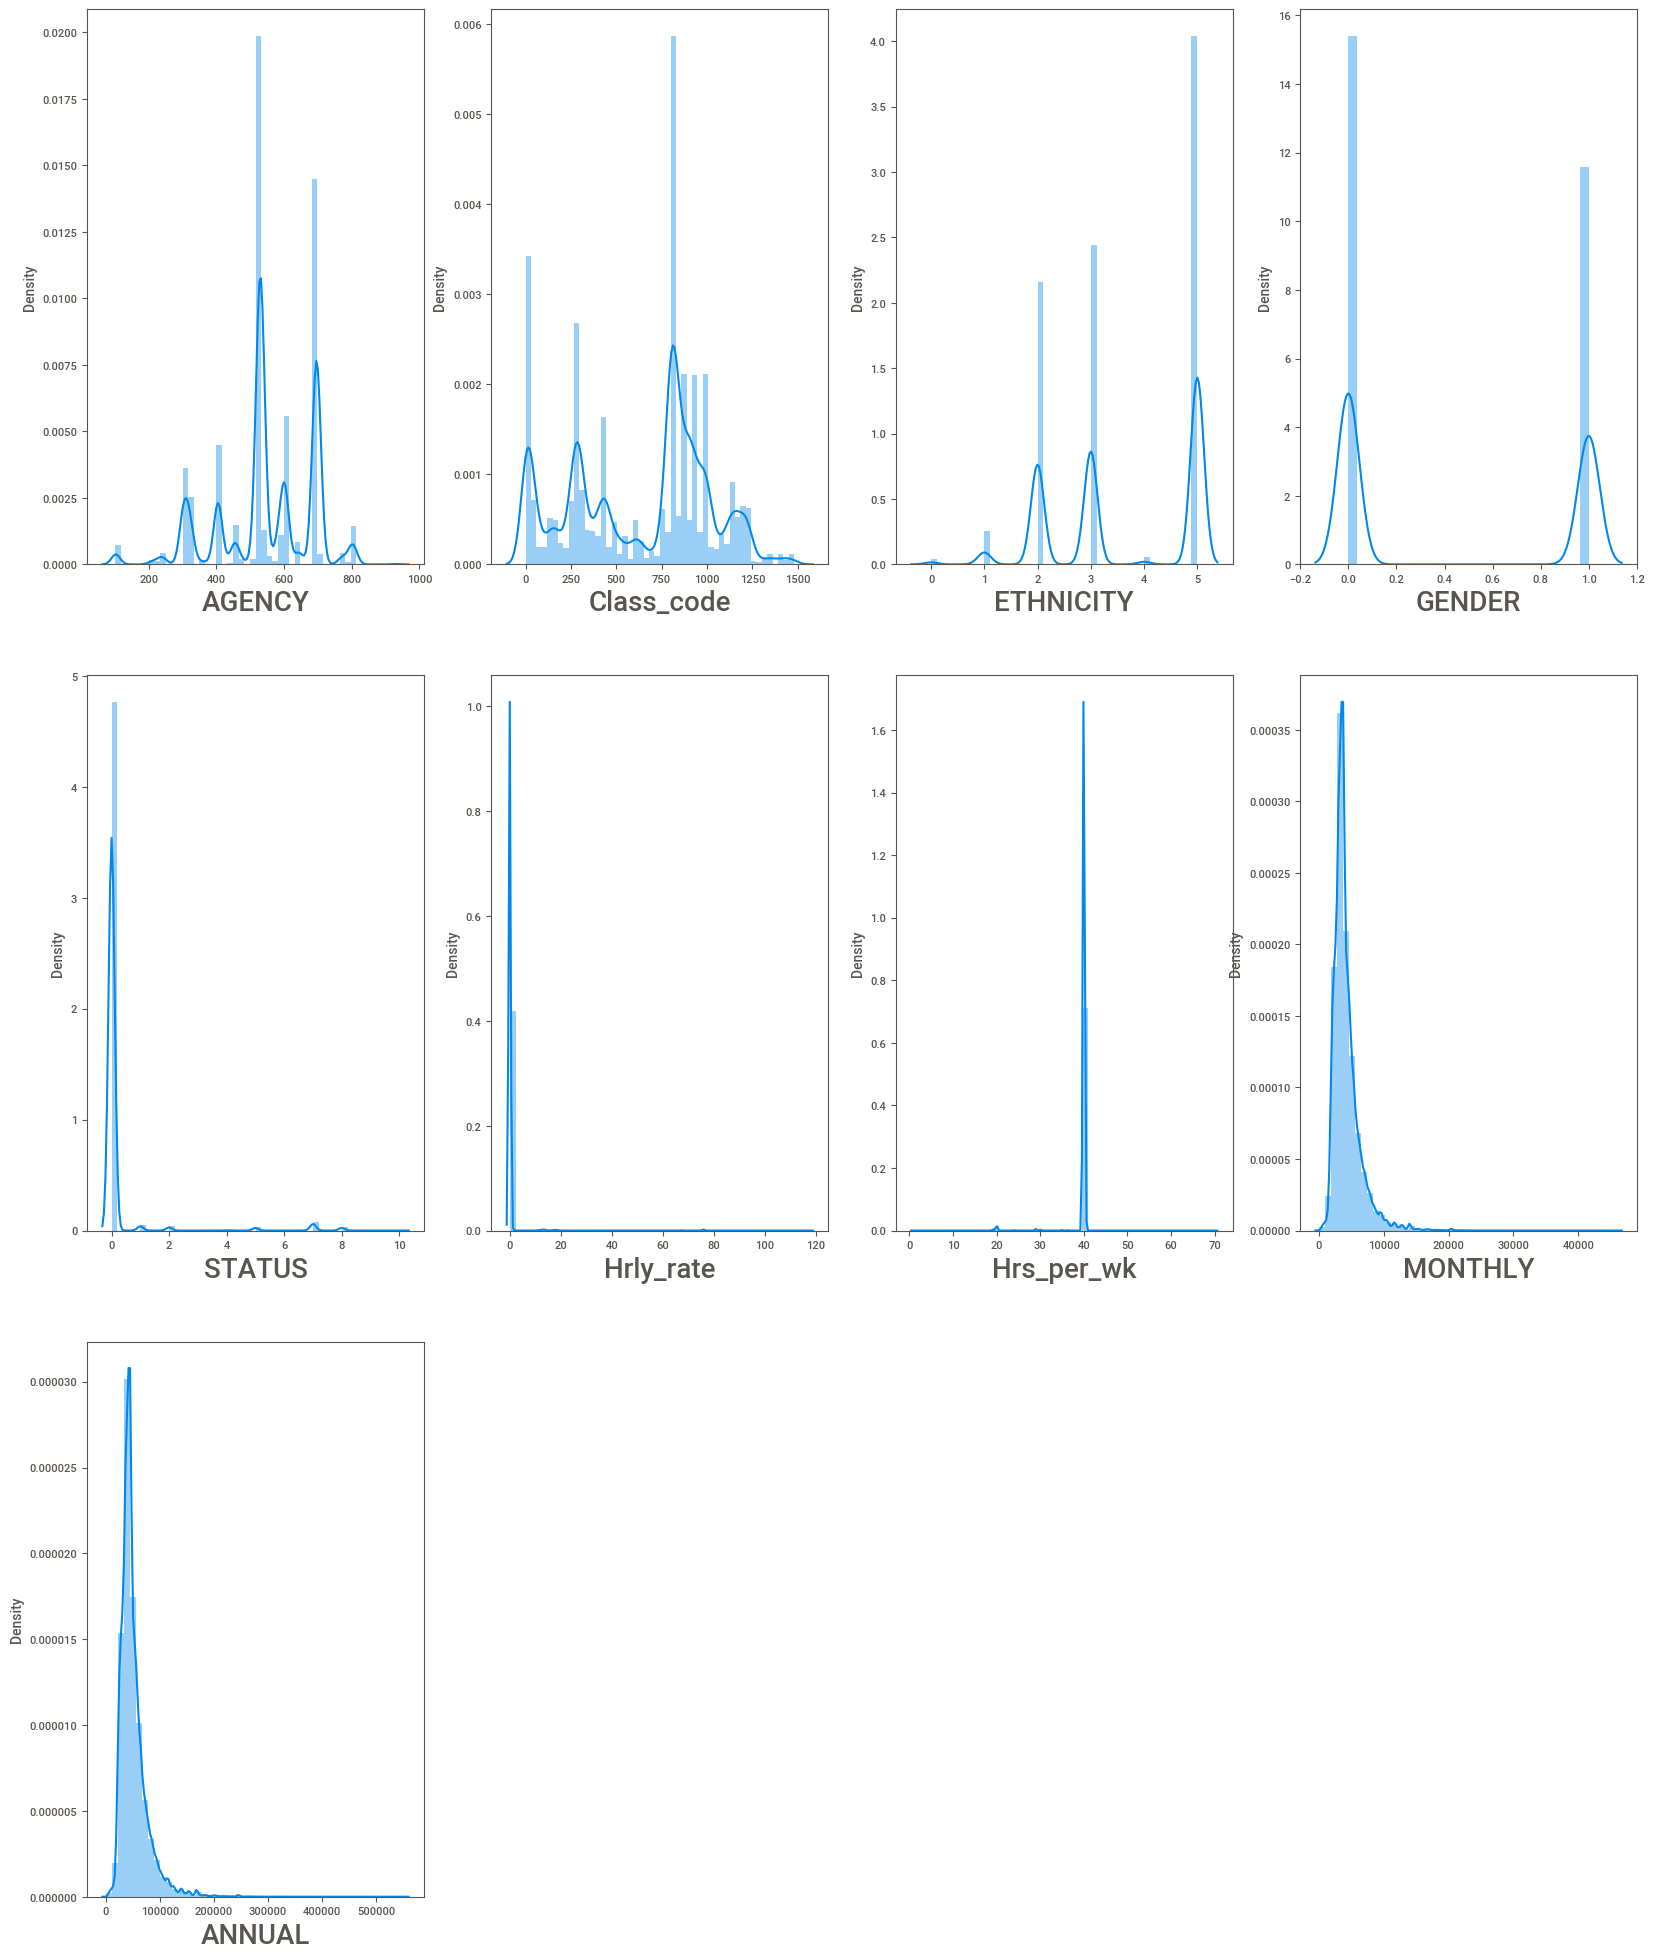

In [37]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=19 :
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

HRLY RATE, HRS PER WK, MONTHLY, ANNUAL Features are showing normal distribution so we are using standard scalar to standardize it. AGENCY Feature is showing skewed distribution, so we are using MinMax scalar to normalize it.

### Scaling

In [38]:
## scaling
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
data[['AGENCY']]=scalar.fit_transform(data[['AGENCY']])

In [39]:
## scaling
from sklearn.preprocessing import StandardScaler
Scalar = StandardScaler()
data[['Hrly_rate','Hrs_per_wk','MONTHLY','ANNUAL']]=scalar.fit_transform(data[['Hrly_rate','Hrs_per_wk','MONTHLY','ANNUAL']])

In [40]:
data.head()

,AGENCY,Class_code,ETHNICITY,GENDER,STATUS,Hrly_rate,Hrs_per_wk,MONTHLY,ANNUAL
0,0.168878,1409,5,1,8,0.644898,0.405797,0.206095,0.206095
1,0.133896,616,5,1,4,0.688051,0.043478,0.029404,0.029404
2,0.168878,1409,5,1,8,0.644898,0.405797,0.206095,0.206095
3,0.133896,616,5,1,4,0.688051,0.043478,0.029404,0.029404
4,0.717732,810,3,0,0,0.000000,0.565217,0.070196,0.070196


In [41]:
## Scaling the data.As we will implement linear regression so we need to make all numerical features into same scale.

## Feature Selection

<AxesSubplot:>

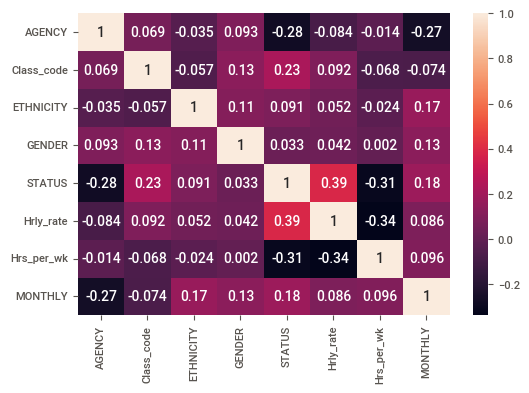

In [42]:
## Checking correlation
sns.heatmap(data.drop('ANNUAL',axis=1).corr(),annot=True)

There seems to be no strong correlation between the features so we are not dropping any features.

## Model Building

In [43]:
## Defining independent and dependent variables
X=data.iloc[:,0:-1]
y=data.ANNUAL

In [44]:
X.head()

,AGENCY,Class_code,ETHNICITY,GENDER,STATUS,Hrly_rate,Hrs_per_wk,MONTHLY
0,0.168878,1409,5,1,8,0.644898,0.405797,0.206095
1,0.133896,616,5,1,4,0.688051,0.043478,0.029404
2,0.168878,1409,5,1,8,0.644898,0.405797,0.206095
3,0.133896,616,5,1,4,0.688051,0.043478,0.029404
4,0.717732,810,3,0,0,0.000000,0.565217,0.070196


In [45]:
## Definiging training and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [56]:
## Model creation
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
y_hat=LR.predict(X_test)

In [57]:
y_hat

array([0.03920282, 0.06458839, 0.14203755, ..., 0.10198481, 0.20896495,
       0.07965643])

### Model Evaluation

In [58]:

## Model Evaluation
##prediciton on training data
y_train_predict=LR.predict(X_train)
from sklearn.metrics import r2_score
train_score=r2_score(y_train,y_train_predict)
train_score

1.0

In [59]:
test_score=r2_score(y_test,y_hat)
test_score

1.0

In [60]:
X_train.shape,X_test.shape

((112110, 8), (37371, 8))

In [61]:
## CHecking adjusted r2 score
train_adjusted_r2 = 1-(1-1)*(112110-1)/(112110-8-1)
train_adjusted_r2

1.0

In [62]:
test_adjusted_r2= 1-(1-1)*(37371-1)/(37371-8-1)
test_adjusted_r2

1.0

In [63]:
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 

In [64]:
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print('LinearRegression for training data: ',model.score(X_train,y_train)*100)
print('LinearRegression for test data :',model.score(X_test,y_test)*100)
print('Mean Squard Error is :',mean_squared_error(y_test, y_predict))
print('Mean Absolute Error is :',mean_absolute_error(y_test, y_predict))

LinearRegression for training data:  100.0
LinearRegression for test data : 100.0
Mean Squard Error is : 4.2322822385539537e-32
Mean Absolute Error is : 1.575629579635364e-16


## R2 score of training and testing data for model is acheived and the R2 score 1 represents the 100% data expaination

## R2 score of training and testing data for model is achieved and  R2 score 1 represents the 100% data explaination